# Learning Algorithm

The learning algorithm is based on a Actor Critic (DDPG)

It follows this sequence:

Actor Network - Execute Policy

- Given a state, choose an action and get reward

Environment - Step through action

- Given state and action, determine next state

Critic Netwotk - Evaluate policy

- Given a state and an action, evaluate policy with Qmax

Update Actor and Critic network

- Update Critic network (using soft update) based loss function (Qpredicted - Qtarget)

- Use gradient clipping for updating critic network:
-- torch.nn.utils.clip_grad_norm_(self.critic_local.parameters(), 1)

- Update Actor network based on -grad(QPredicted)

The environment

- 2 action inputs
- 24 state observations

Actor Network

- Inout 33 state observations
- 2 layers with 400 and 300 neurons
- Batch normalization after first layer
- Two RELU activation functions
- Linear output layer to 4 actions with tanh activation function

Critic Network

- Inout 33 state observations; 4 actions
- 2 layers with 400 and 300 neurons
- Batch normalization after first layer
- Two RELU activation functions
- Fully connected layer to single output using RELU activation



# Model and Hyperparameters

- 2 agents fill a buffer of states, actions and rewards every single step
- Actor and Critic get updated 2 times every 2 steps using a soft update

- Learning algorithm function:
        n_episodes (int): maximum number of training episodes: 5000
        max_t (int): maximum number of timesteps per episode: 1000

- Hyperparameters
            
BUFFER_SIZE = int(1e6)  # replay buffer size

BATCH_SIZE = 256        # minibatch size

GAMMA = 0.99            # discount factor

TAU = 1e-3              # for soft update of target parameters

LR_ACTOR = 1e-3         # learning rate of the actor 

LR_CRITIC = 1e-3        # learning rate of the critic

WEIGHT_DECAY = 0        # L2 weight decay

UPDATE_RATE = 2         # update frequency

UPDATE_TIMES = 2      # number of updates 


- Noise:

Ornstein-Uhlenbeck process
mu=0., theta=.15, sigma=0.2

- Noise decay: Introduced a fuction that reduces noise as reward increases. This seems to make learning more stable and faster. 

decay = (1/2)**(scores_average[i_episode-1]/.1)


# Plot of Rewards

The rewards averaged over 100 episodes reach 0.5 at Eposide 1750. The reward value peaks at 2.14 at episode 2250.

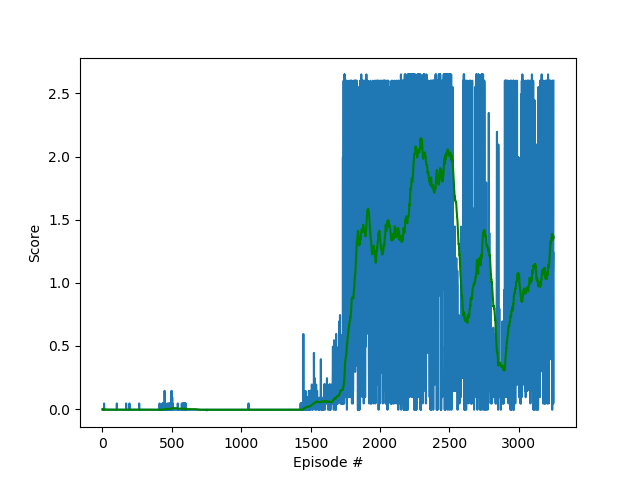


A previous experiment with no noise decay resulted in significant worse performance, although still acceptable. See below

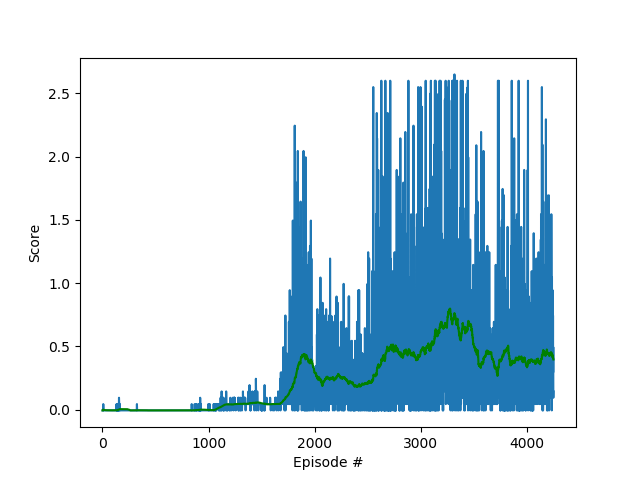



# Trained Model

Below you can see video of the trained model 

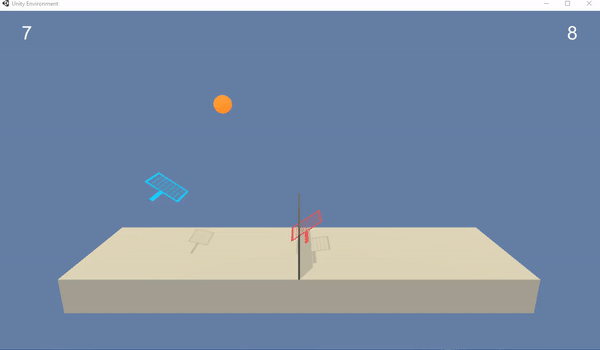



# Ideas for Future Work

It seems like the network decreases in performance after a certain number of eposides. The question is what can be done to stabilize the learning or keep on improving it. It seems similar to the problem of overfitting a network in supervised learning. These are some ideas to try:

- Inject noise when the average rewards start decreasing. This might avoid having the network get into a local optima

- Decrease the soft update as the rewards increase. You want to be more conservative in updating the network, when the performance is good and not put too much weight on negative examples. 

- Maybe to improve the performance of the network, we need more granular information on what agent action/s was responsible for dropping the ball. 


It would be interesting to try the following modidifications:

- Larger batch sizes using a GPU
- Prioritized buffer sampling


